In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('eda_ready.csv')

In [4]:
df.sample(5)

,society,price,area_persqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,sector,area,type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
474,indiabulls centrum park,1.01,8080.0,2.0,2.0,3,store room,5.0,West,Relatively New,sector 103,1250.0sq-ft,flat,1423.0,NaN,1250.0,0,0,1,0,0,0,165
1554,ss the leaf,2.1,7467.0,4.0,5.0,3+,not avilable,9.0,East,Relatively New,sector 85,2812.374sq-ft,flat,2812.0,NaN,NaN,0,0,0,0,0,0,67
2354,birla navya,3.23,26875.0,3.0,3.0,3,servant room,4.0,West,New Property,sector 63a,1201.86sq-ft,flat,2150.0,NaN,1200.0,0,1,0,0,0,2,52
3493,NaN,0.18,4000.0,2.0,1.0,1,not avilable,1.0,East,Relatively New,damdama,452.0,house,NaN,450.0,NaN,0,0,0,0,0,2,0
1076,the close north,2.65,10685.0,3.0,4.0,3+,servant room,6.0,North,Moderately Old,sector 50,2480.112sq-ft,flat,2480.0,2470.0,2000.0,0,1,0,0,0,0,174


In [5]:
df.rename(columns={'area_persqft':'price_persqft'},inplace=True)

In [6]:
df.sample(5)

,society,price,price_persqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,sector,area,type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
58,unitech the residences,1.55,9872.0,3.0,4.0,1,servant room,1.0,South,Relatively New,sector 33,1570.097sq-ft,flat,1570.0,NaN,NaN,0,1,0,0,0,2,37
2416,breez global hill view,0.32,5776.0,2.0,2.0,2,not avilable,19.0,North,Relatively New,sohna road,554.017sq-ft,flat,NaN,NaN,554.0,0,0,0,0,0,0,21
2703,signature global city,1.1,8800.0,3.0,3.0,3,not avilable,1.0,NaN,Undefined,sector 37d,1250.0sq-ft,flat,NaN,NaN,1250.0,0,0,0,0,0,2,16
1219,tulip violet,1.55,9822.0,3.0,3.0,2,pooja room,5.0,North-East,Relatively New,sector 69,1578.09sq-ft,flat,1578.0,NaN,NaN,0,0,0,1,0,2,99
2632,milan cghs 9,2.0,8333.0,3.0,3.0,3+,not avilable,0.0,NaN,Undefined,sector 39,2400.096sq-ft,flat,NaN,2400.0,NaN,0,0,0,0,0,2,0


In [7]:
df.duplicated().sum()

152

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(3905, 23)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3905 entries, 0 to 4056
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   society              3311 non-null   object 
 1   price                3824 non-null   object 
 2   price_persqft        3856 non-null   float64
 3   bedRoom              3843 non-null   float64
 4   bathroom             3843 non-null   float64
 5   balcony              3843 non-null   object 
 6   additionalRoom       3905 non-null   object 
 7   floorNum             3823 non-null   float64
 8   facing               2720 non-null   object 
 9   agePossession        3905 non-null   object 
 10  sector               3905 non-null   object 
 11  area                 3887 non-null   object 
 12  type                 3905 non-null   object 
 13  super_built_up_area  1893 non-null   float64
 14  built_up_area        1872 non-null   float64
 15  carpet_area          1934 non-null   float6

# society

In [11]:
df['society'].nunique()

724

In [12]:
df['society'].isnull().sum()

594

In [13]:
df.loc[df['society'].isnull(),'society']='indepedent'

In [14]:
df['society'].value_counts()

society
indepedent                                           594
tulip violet                                          75
ss the leaf                                           73
shapoorji pallonji joyville gurugram                  42
dlf new town heights                                  42
signature global park                                 35
shree vardhman victoria                               34
smart world orchard                                   32
emaar mgf emerald floors premier                      32
paras dews                                            31
dlf the ultima                                        31
m3m woodshire                                         30
dlf regal gardens                                     30
shree vardhman flora                                  29
la vida by tata housing                               28
smart world gems                                      28
godrej nature plus                                    27
signature global solera

<Axes: xlabel='society'>

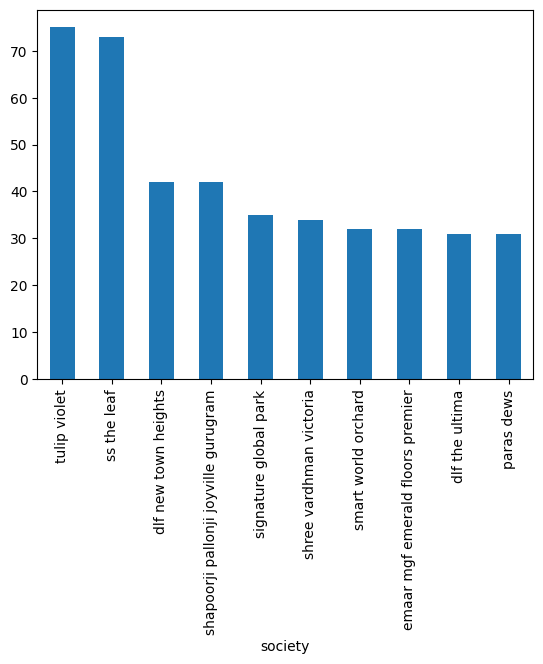

In [15]:
df[df['society']!='indepedent']['society'].value_counts().head(10).plot(kind='bar')

In [16]:
society_counts=df['society'].value_counts()
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}

In [17]:
frequency_bins

{'Very High (>100)': 1,
 'High (50-100)': 2,
 'Average (10-49)': 92,
 'Low (2-9)': 293,
 'Very Low (1)': 337}

<h2> Observation</h2>
<ul>
    <li><strong><h4> there are 725 unique society in dataset </h4> </strong></li>
    <li><strong><h4> there are 594 indepedent house </h4> </strong></li>
    <li><strong><h4> top 10 society are in above graph (y-axis frequency) </h4> </strong></li>
    <li><strong><h4> tulip violet society are listed max(75) times </h4> </strong></li>
    <li><strong><h4> there are 2 society which are listed between (50-100) times </h4> </strong></li>
    <li><strong><h4> there are 92 society which are listed between (10-49) times </h4><strong></li>
    <li><strong><h4> there are 293 society which are listed between (2-9) times</h4><strong></li>
    <li><strong><h4> there are only 337 society which are listed only 1 times</h4><strong></li> 

In [18]:
df[df['society'].map(df['society'].value_counts()) == 1]
# these are society which appeared only one time

,society,price,price_persqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,sector,area,type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,maa bhagwati residency,0.45,5000.0,2.0,2.0,1,not avilable,4.0,West,Relatively New,sector 7,900.0sq-ft,flat,NaN,NaN,900.000000,0,0,0,0,0,2,28
4,parkwood westend,0.7,5204.0,2.0,2.0,3,study room,5.0,NaN,Under Construction,sector 92,1345.119sq-ft,flat,1345.0,NaN,NaN,1,0,0,0,0,2,0
5,signature global infinity mall,0.41,6269.0,2.0,2.0,3,not avilable,3.0,NaN,Undefined,sector 36,654.012sq-ft,flat,NaN,654.0,NaN,0,0,0,0,0,2,0
6,the cocoon,2.0,13333.0,3.0,3.0,3,not avilable,5.0,NaN,New Property,dwarka expressway,1500.038sq-ft,flat,1500.0,NaN,NaN,0,0,0,0,0,2,0
16,senate court,0.9,14084.0,1.0,1.0,0,not avilable,0.0,NaN,Undefined,sector 62,639.023sq-ft,flat,NaN,639.0,NaN,0,0,0,0,0,2,0
18,signature global orchard avenue 2,NaN,NaN,2.0,2.0,3,not avilable,11.0,East,Under Construction,sector 93,nansq-ft,flat,NaN,NaN,577.160318,0,0,0,0,0,2,104
25,the new people apartments,PriceonRequest,NaN,5.0,1.0,0,not avilable,0.0,NaN,Undefined,sector 1,nansq-ft,flat,NaN,4500.0,NaN,0,0,0,0,0,2,0
26,the serenas,0.42,7910.0,2.0,2.0,1,not avilable,3.0,NaN,Undefined,sector 36,530.973sq-ft,flat,NaN,NaN,531.000000,0,0,0,0,0,2,0
28,central park resort belgravia residences,6.25,24300.0,3.0,5.0,3+,servant room,5.0,South-East,Moderately Old,sector 48,2572.016sq-ft,flat,NaN,NaN,2880.000000,0,1,0,0,0,0,49
29,apex builders,0.42,5600.0,2.0,2.0,2,not avilable,4.0,North,Relatively New,sector 37c,750.0sq-ft,flat,NaN,NaN,750.000000,0,0,0,0,0,2,42


# price

In [19]:
df.loc[df['price']=='PriceonRequest','price']=np.nan

In [20]:
df['price'].isnull().sum()

101

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df['price']=df['price'].astype(float)

In [23]:
df['price'].describe()

count    3804.000000
mean        2.505702
std         2.954534
min         0.070000
25%         0.920000
50%         1.500000
75%         2.700000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Percent'>

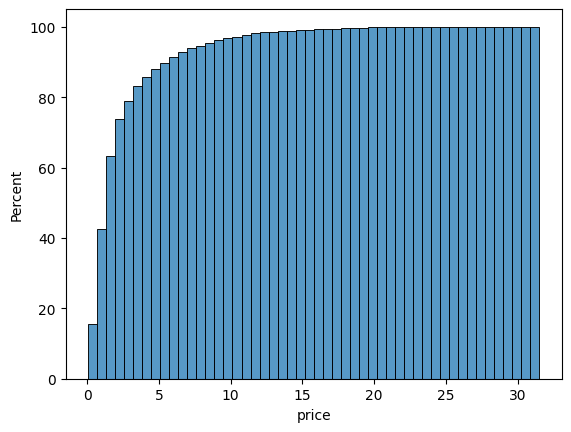

In [24]:
sns.histplot(x=df['price'],bins=50,stat='percent',cumulative=True)
# under 20 crore 90% data lie

/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_34582/2605361434.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['price'],bins=50,kde=True,hist=False)


<Axes: ylabel='Density'>

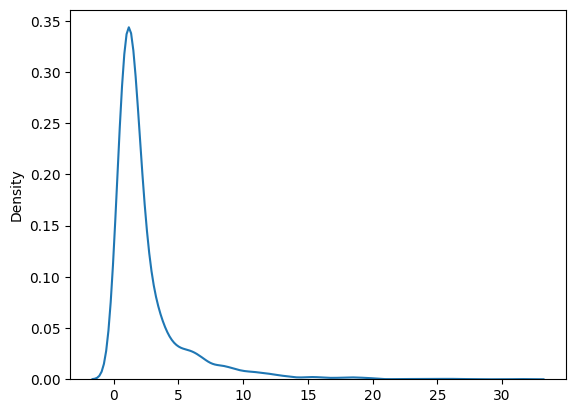

In [25]:
sns.distplot(x=df['price'],bins=50,kde=True,hist=False)
# right skewed 

In [26]:
df['price'].kurtosis()# excess kurtosis outliers are very often fat taildness

15.130583324079616

In [27]:
df['price'].skew()# positively skewed distribution

3.2960723032158237

In [28]:
# qunatile analysis
df['price'].quantile([0.25,0.75,0.95,0.99,1])

0.25     0.920
0.75     2.700
0.95     8.490
0.99    15.097
1.00    31.500
Name: price, dtype: float64

<Axes: >

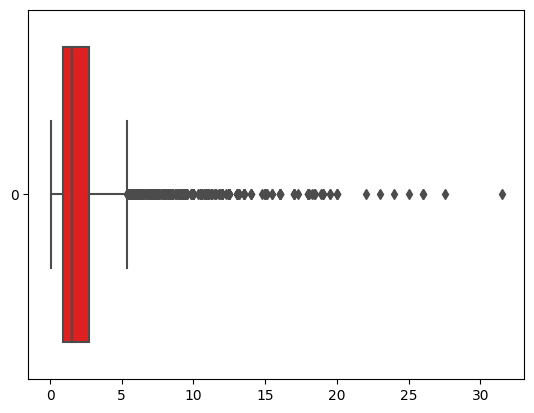

In [29]:
# box plot outliers
sns.boxplot(df['price'],color='red',orient='h')

<Axes: xlabel='price'>

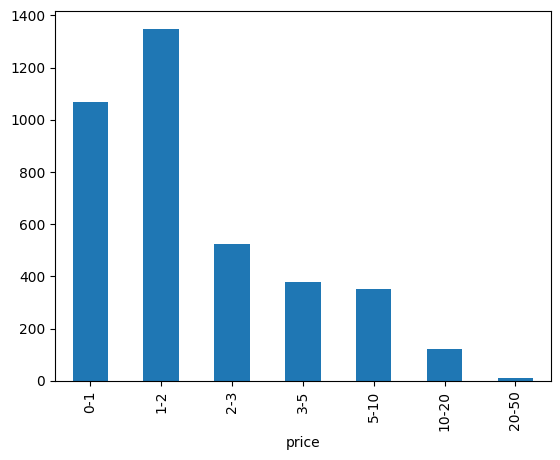

In [30]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

<h2> Observation</h2>
<ul>
    <li><strong><h4> median of price columns = 1.5cr </h4> </strong></li>
    <li><strong><h4> 99% of property of dataset  under 15cr </h4> </strong></li>
    <li><strong><h4> more no of property between 1-2 cr </h4> </strong></li>
    <li><strong><h4> maximum value of price is ~31cr </h4> </strong></li>
    <li><strong><h4> distribution of price is right skewed means there is assymetry in graph most of the points are concentrated on left side of mean </h4> </strong></li>
    <li><strong><h4> high kurtosis value there is pottienial outliers in the price column </h4> </strong></li>
    <li><strong><h4> from the box-plot prices above 10 crore are outliers but there are so many in numbers so may be they justified by other factors</h4> </strong></li>
    <li><strong><h4> we should apply some sort of transformation to the distribution of data probably log transformation to right skewed curve</h4> </strong></li>

/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_34582/1130275712.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'],bins=50,kde=True,hist=False,ax=axes[0])
/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_34582/1130275712.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6

Text(0.5, 1.0, 'with log_transformation')

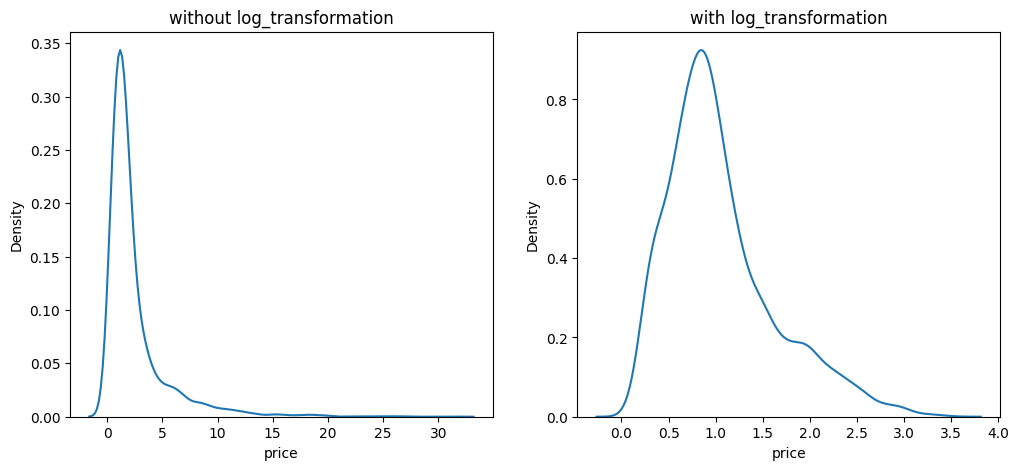

In [31]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.distplot(df['price'],bins=50,kde=True,hist=False,ax=axes[0])
axes[0].set_title('without log_transformation')
sns.distplot(np.log1p(df['price']),bins=50,kde=True,hist=False,ax=axes[1])
axes[1].set_title('with log_transformation')


In [32]:
skew=np.log1p(df['price']).skew()
kurtosis=np.log1p(df['price']).kurtosis()
print(skew,kurtosis)

1.0722648542328952 0.9689335792432354


<Axes: >

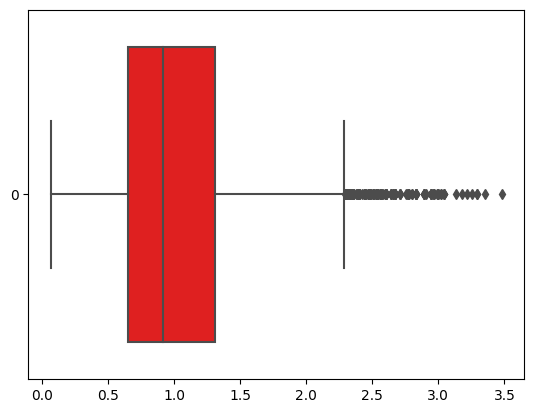

In [33]:
sns.boxplot(np.log1p(df['price']),color='red',orient='h')

<Axes: >

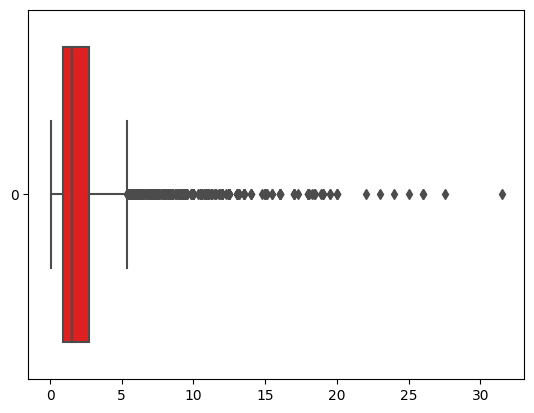

In [34]:
sns.boxplot(df['price'],color='red',orient='h')
# there is less no. of outlier on log_scale we should check the distribution of price after log transformation

## price_persqft

In [35]:
df['price_persqft'].isnull().sum()

49

In [36]:
df['price_persqft'].describe()

count      3856.000000
mean      14024.935425
std       23207.280780
min           2.000000
25%        6838.500000
50%        9051.500000
75%       13913.000000
max      600000.000000
Name: price_persqft, dtype: float64

In [37]:
df[df['price_persqft']==600000]

,society,price,price_persqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,sector,area,type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3665,emaar the palm springs,24.0,600000.0,5.0,5.0,2,"pooja room,study room,servant room",1.0,North-East,Old Property,sector 54,398.0,house,NaN,400.0,NaN,1,1,0,1,0,0,122


<h2> Observation</h2>
<ul>
    <li><strong><h4> may be some data error because these value is extreme outlier </h4> </strong></li>
    

In [38]:
#binning
bins = [0, 10000, 15000, 20000, 25000, 25000, 30000, 40000, 50000, 60000, 70000, 80000, 100000]
df['price_bins'] = pd.cut(df['price_persqft'], bins=bins,duplicates='drop')

<Axes: xlabel='price_bins'>

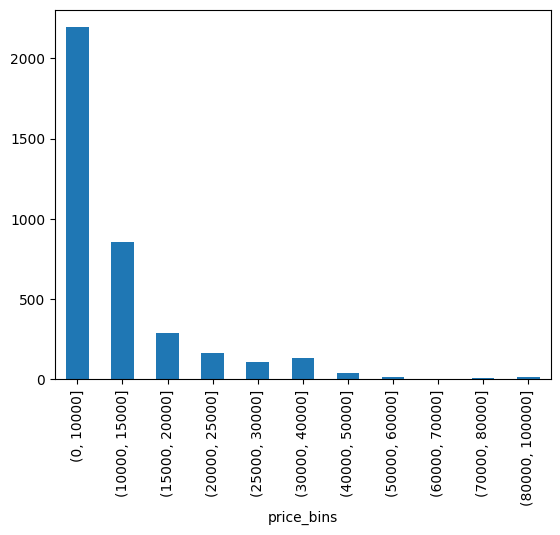

In [39]:
df['price_bins'].value_counts().sort_index().plot(kind='bar')

(0.0, 50000.0)

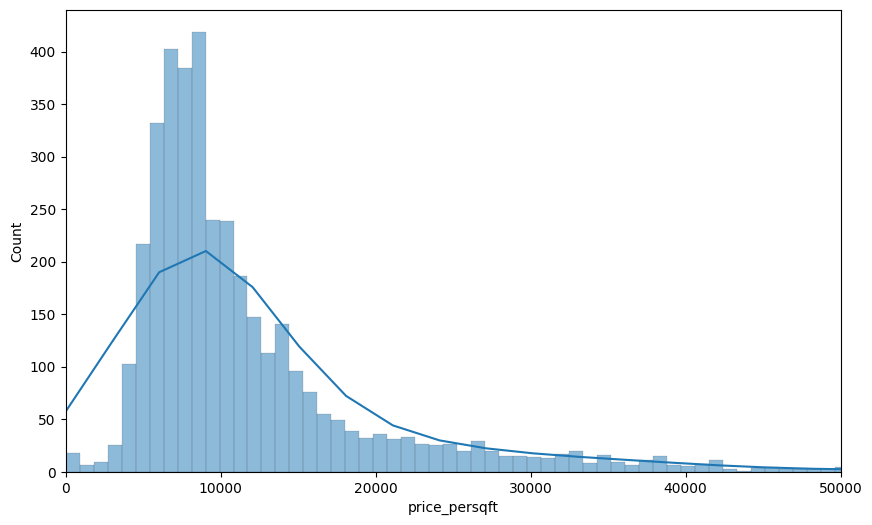

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_persqft'],kde=True,stat='count')
plt.xlim(xmin=0,xmax=50000)

<Axes: >

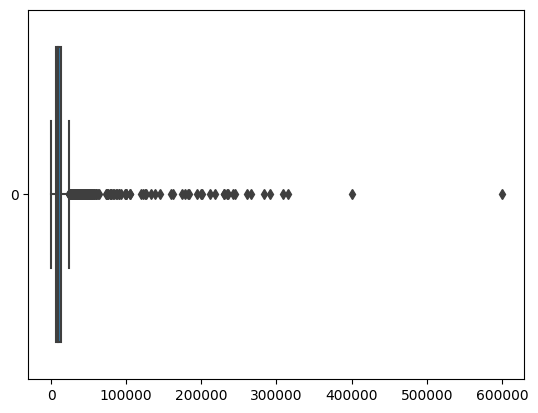

In [41]:
sns.boxplot(df['price_persqft'],orient='h')

<h2> Observation</h2>
<ul>
    <li><strong><h4> around 2000 property have range between(0-10000)rs per_sqft </h4> </strong></li>
    <li><strong><h4> 99% of property of dataset have price_persqft under 38000rs </h4> </strong></li>
    <li><strong><h4> maximum value of price_persqft is 600000rs </h4> </strong></li>
    <li><strong><h4> most of the points are between (0-25000)rs </h4> </strong></li>

## bedRoom

In [42]:
df['bedRoom'].isnull().sum()

62

In [43]:
df[df['bedRoom'].isnull()]

,society,price,price_persqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,sector,area,type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,price_bins
3064,international city by sobha phase 2,NaN,13622.0,NaN,NaN,NaN,not avilable,NaN,NaN,Undefined,sector 109,6178.0,house,NaN,6178.0,NaN,0,0,0,0,0,2,46,"(10000.0, 15000.0]"
3065,international city by sobha phase 2,NaN,13909.0,NaN,NaN,NaN,not avilable,NaN,NaN,Undefined,sector 109,4176.0,house,NaN,4176.0,NaN,0,0,0,0,0,2,46,"(10000.0, 15000.0]"
3068,emaar mgf marbella,NaN,16058.0,NaN,NaN,NaN,not avilable,NaN,NaN,Undefined,sector 66,7319.0,house,NaN,7319.0,NaN,0,0,0,0,0,2,74,"(15000.0, 20000.0]"
3069,emaar mgf marbella,NaN,16058.0,NaN,NaN,NaN,not avilable,NaN,NaN,Undefined,sector 66,5608.0,house,NaN,5608.0,NaN,0,0,0,0,0,2,74,"(15000.0, 20000.0]"
3070,international city by sobha phase 2,NaN,13623.0,NaN,NaN,NaN,not avilable,NaN,NaN,Undefined,sector 109,6178.0,house,NaN,6178.0,NaN,0,0,0,0,0,2,46,"(10000.0, 15000.0]"
3071,international city by sobha phase 2,NaN,13910.0,NaN,NaN,NaN,not avilable,NaN,NaN,Undefined,sector 109,3832.0,house,NaN,3832.0,NaN,0,0,0,0,0,2,46,"(10000.0, 15000.0]"
3072,international city by sobha phase 2,NaN,13910.0,NaN,NaN,NaN,not avilable,NaN,NaN,Undefined,sector 109,3154.0,house,NaN,3154.0,NaN,0,0,0,0,0,2,46,"(10000.0, 15000.0]"
3073,experion windchants,NaN,12027.0,NaN,NaN,NaN,not avilable,NaN,NaN,Undefined,sector 112,6872.0,house,NaN,6872.0,NaN,0,0,0,0,0,2,57,"(10000.0, 15000.0]"
3074,emaar mgf marbella,NaN,15700.0,NaN,NaN,NaN,not avilable,NaN,NaN,Undefined,sector 66,5608.0,house,NaN,5608.0,NaN,0,0,0,0,0,2,74,"(15000.0, 20000.0]"
3075,emaar mgf marbella,NaN,19708.0,NaN,NaN,NaN,not avilable,NaN,NaN,Undefined,sector 66,6522.0,house,NaN,6522.0,NaN,0,0,0,0,0,2,74,"(15000.0, 20000.0]"


<Axes: xlabel='bedRoom'>

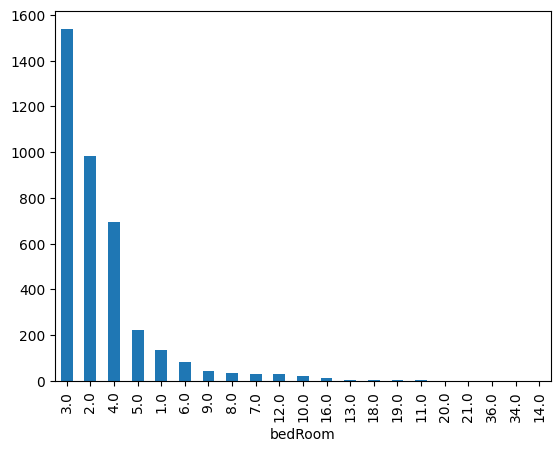

In [44]:
df['bedRoom'].value_counts().plot(kind='bar')

<Axes: xlabel='bedRoom'>

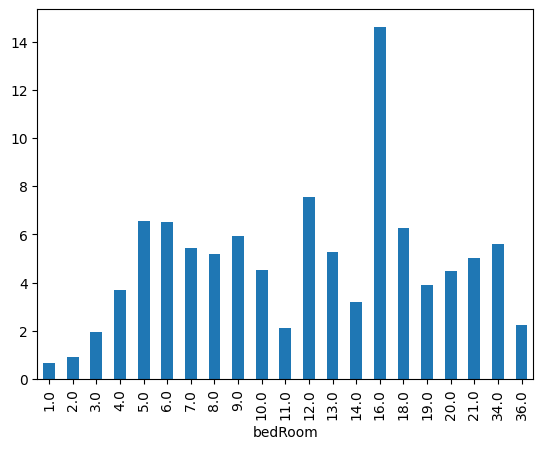

In [45]:
df.groupby('bedRoom')['price'].mean().plot(kind='bar')

<h2> Observation</h2>
<ul>
    <li><strong><h4> there are 62 null values in bedroom column </h4> </strong></li>
    <li><strong><h4> most of the property have 3,2,4,5 bedrooms </h4> </strong></li>

# bathroom

In [46]:
df['bathroom'].isnull().sum()

62

<Axes: xlabel='bathroom'>

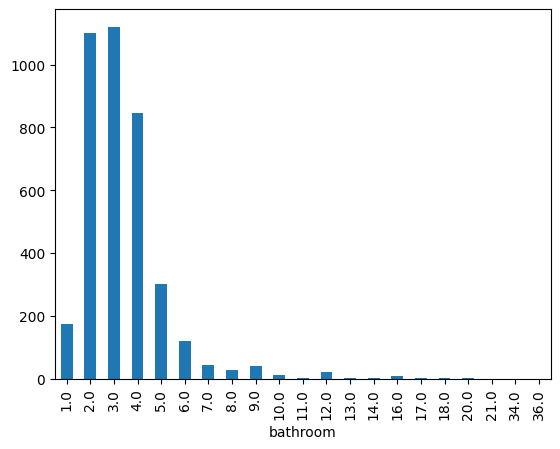

In [47]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

# balcony

In [48]:
df['balcony'].isnull().sum()

62

<Axes: xlabel='balcony'>

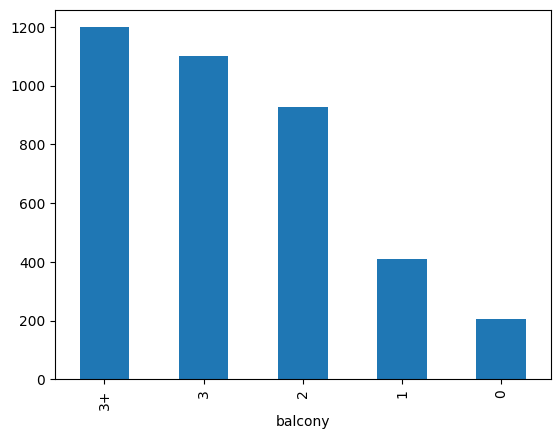

In [49]:
df['balcony'].value_counts().plot(kind='bar')

# Floor Num

In [50]:
df.columns

Index(['society', 'price', 'price_persqft', 'bedRoom', 'bathroom', 'balcony',
       'additionalRoom', 'floorNum', 'facing', 'agePossession', 'sector',
       'area', 'type', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score', 'price_bins'],
      dtype='object')

In [51]:
df['floorNum'].isnull().sum()

82

<Axes: xlabel='floorNum'>

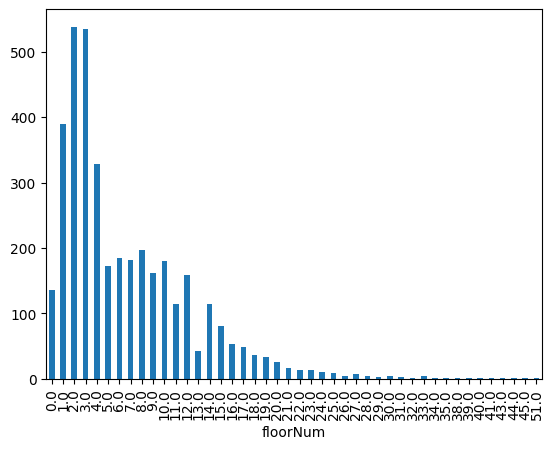

In [52]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

# facing

In [53]:
df['facing'].isnull().sum()

1185

<Axes: xlabel='facing'>

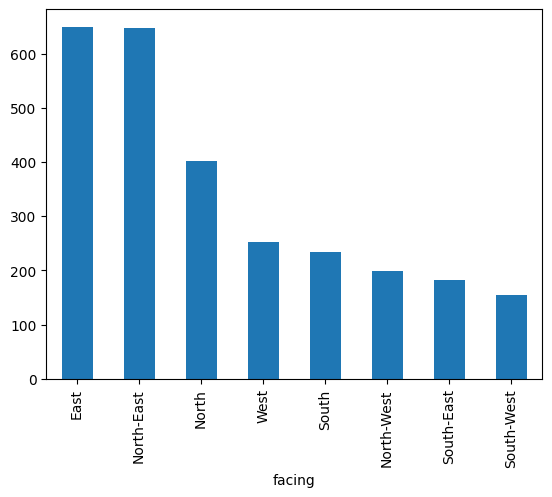

In [54]:
df['facing'].value_counts().plot(kind='bar')

# age Possession

In [55]:
df['agePossession'].isnull().sum()

0

<Axes: xlabel='agePossession'>

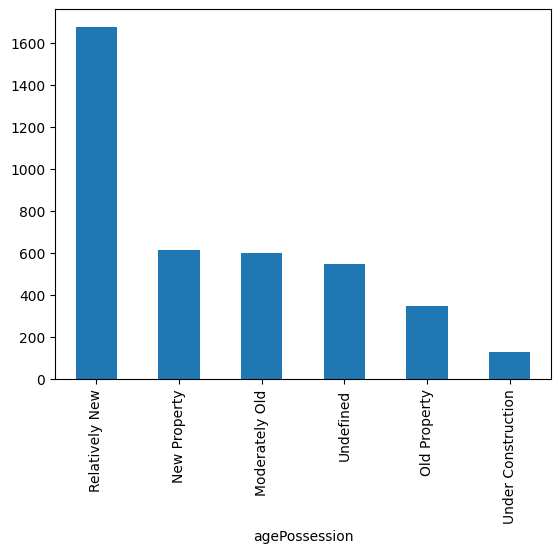

In [56]:
df['agePossession'].value_counts().plot(kind='bar')

# sector

In [57]:
df['sector'].isnull().sum()

0

<Axes: xlabel='sector'>

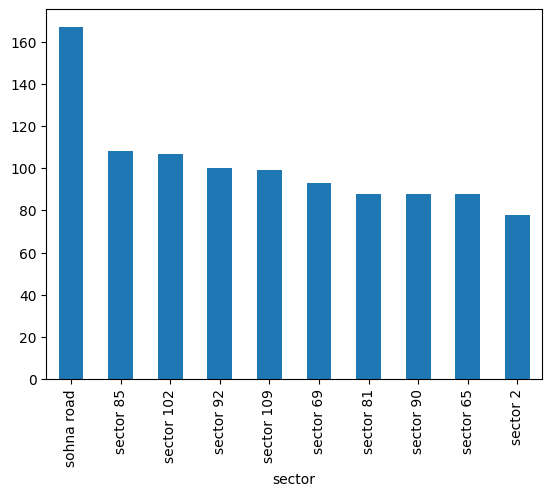

In [58]:
df['sector'].value_counts().head(10).plot(kind='bar')

# area

In [59]:
df['area'].isnull().sum()

18

In [60]:
import re
def remove(text):
    if 'sq-ft'in text:
        new_text=re.sub('sq-ft','',text)
        return new_text
    else:
        return text

In [61]:
df['area']=df['area'].astype(str).apply(remove)

In [62]:
def remove1(text):
    if type(text)==float:
        return
    else:
        match=re.search('\((\d*\.?\d+) sq\.m\.\)',text)
        if match:
             return round(float(match.group(1))*10.76)
        else:
            return float(text)

In [63]:
df['dummy']=df['area']

In [64]:
df['dummy']=df['dummy'].apply(remove1)

In [65]:
df['dummy']

0           900.000
1           650.026
2           595.061
3          1200.000
4          1345.119
5           654.012
6          1500.038
7          2290.076
8          1350.025
9          2813.148
10          982.902
11          519.062
12         1945.245
13         1385.042
14         1300.149
15         2342.962
16          639.023
17          915.033
18              NaN
19         2100.038
20         1103.102
21         2150.163
22         1103.130
23         2025.178
24         2217.036
25              NaN
26          530.973
27         3354.972
28         2572.016
29          750.000
30         1056.008
31          594.001
32         3200.079
33          625.521
34         1300.092
35         1300.052
36         1179.856
37         2030.228
38          555.247
39         1365.068
40         1320.045
41         1193.548
42         2000.000
43         2038.257
44          700.084
45         1210.808
46         2727.148
47         1385.042
48         1829.085
49         2100.056


## dummy column have mixed type of area like plot,super_builtup,built_up,and carpet area.

/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_34582/174055599.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['dummy'])


<Axes: xlabel='dummy', ylabel='Density'>

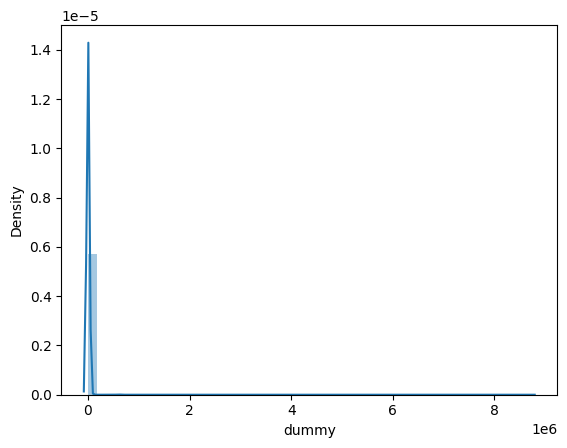

In [66]:
sns.distplot(df['dummy'])

In [67]:
df['dummy'].sort_values(ascending=False).head(10)

3272    8711260.000
2447     875000.000
114      642857.143
1308     620000.000
1971     566666.667
3438     215949.000
3406      82789.000
2337      65517.241
1310      65517.241
3487      65227.000
Name: dummy, dtype: float64

<Axes: >

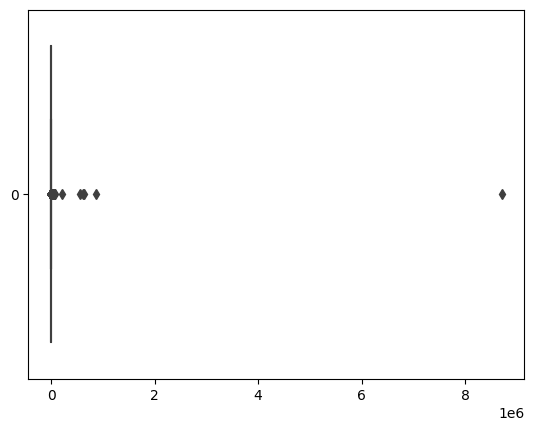

In [68]:
sns.boxplot(df['dummy'],orient='h')

<h2> Observation</h2>
<ul>
    <li><strong><h4> may be some data error because these value is extreme outlier </h4> </strong></li>
    

# type

In [69]:
df['type'].isnull().sum()

0

<Axes: xlabel='type'>

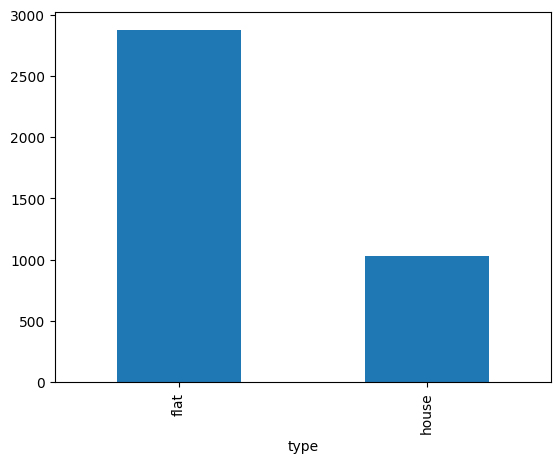

In [70]:
df['type'].value_counts().plot(kind='bar')

# super_built_up_area

In [71]:
df['super_built_up_area'].isnull().sum()

2012

In [72]:
df['super_built_up_area'].sort_values(ascending=False).head(10)

673     10000.0
1546     6926.0
1074     6000.0
1220     5800.0
590      5800.0
1198     5514.0
381      5350.0
1101     5350.0
2322     5200.0
1600     5200.0
Name: super_built_up_area, dtype: float64

/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_34582/4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

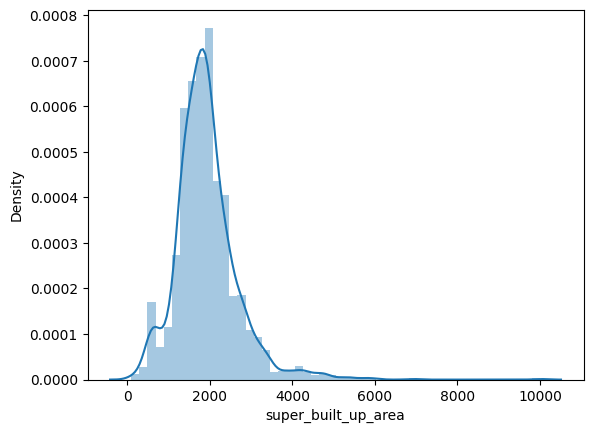

In [73]:
sns.distplot(df['super_built_up_area'])

# built up area

In [74]:
df['built_up_area'].isnull().sum()

2033

In [75]:
df['built_up_area'].sort_values(ascending=False).head(10)

2447    737147.0
3227     26000.0
3147     13500.0
3456     12000.0
3709     11286.0
3990      9500.0
3961      9000.0
3900      9000.0
3683      9000.0
3862      9000.0
Name: built_up_area, dtype: float64

In [76]:
df.loc[2447]

society                hcbs sports ville
price                               0.35
price_persqft                        4.0
bedRoom                              2.0
bathroom                             2.0
balcony                                2
additionalRoom              not avilable
floorNum                             8.0
facing                               NaN
agePossession             Relatively New
sector                        sohna road
area                            875000.0
type                                flat
super_built_up_area                  NaN
built_up_area                   737147.0
carpet_area                          NaN
study room                             0
servant room                           0
store room                             0
pooja room                             0
others                                 0
furnishing_type                        1
luxury_score                          44
price_bins                    (0, 10000]
dummy           

/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_34582/3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

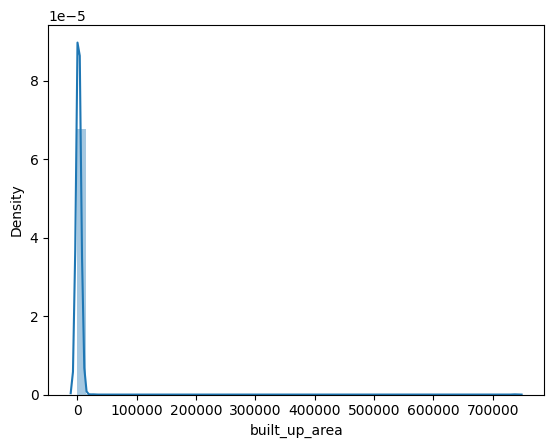

In [77]:
sns.distplot(df['built_up_area'])

(0.0, 10000.0)

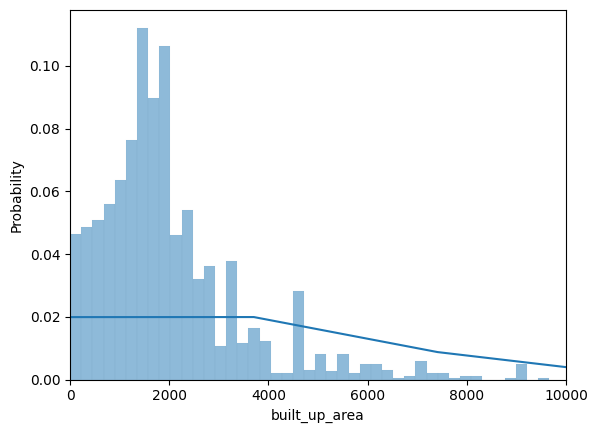

In [78]:
sns.histplot(df['built_up_area'],kde=True,stat='probability')
plt.xlim(xmin=0,xmax=10000)

<Axes: >

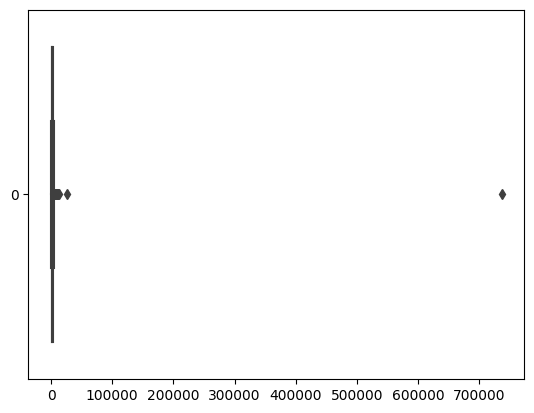

In [79]:
sns.boxplot(df['built_up_area'],orient='h')

<h2> Observation</h2>
<ul>
    <li><strong><h4> may be some data error because these value is extreme outlier </h4> </strong></li>
    

# carpet area

In [80]:
df['carpet_area'].isnull().sum()

1971

In [81]:
df['carpet_area'].sort_values(ascending=False).head(10)

1308    607936.0
114     569243.0
1971    514396.0
2337     64529.0
1310     64412.0
82       58141.0
1309     54917.0
1432     48811.0
1306     45966.0
1311     34401.0
Name: carpet_area, dtype: float64

/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_34582/235513542.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area']) # outlier


<Axes: xlabel='carpet_area', ylabel='Density'>

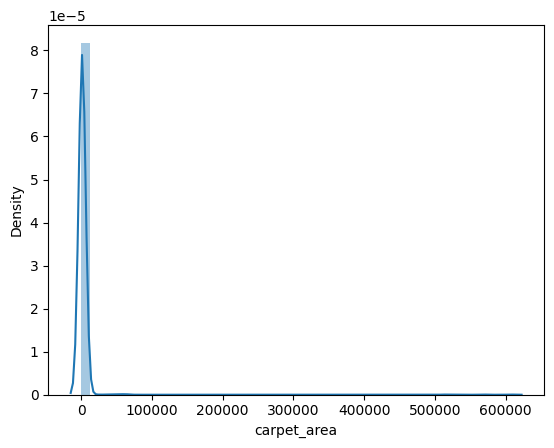

In [82]:
sns.distplot(df['carpet_area']) # outlier

<Axes: >

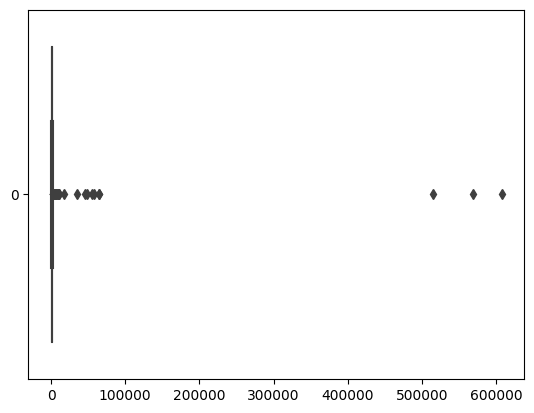

In [83]:
sns.boxplot(df['carpet_area'],orient='h')

<h2> Observation</h2>
<ul>
    <li><strong><h4> may be some data error because these value is extreme outlier </h4> </strong></li>
    

In [84]:
df.columns

Index(['society', 'price', 'price_persqft', 'bedRoom', 'bathroom', 'balcony',
       'additionalRoom', 'floorNum', 'facing', 'agePossession', 'sector',
       'area', 'type', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score', 'price_bins', 'dummy'],
      dtype='object')

# furnishing_type

In [85]:
df['furnishing_type'].isnull().sum()

0

<Axes: ylabel='count'>

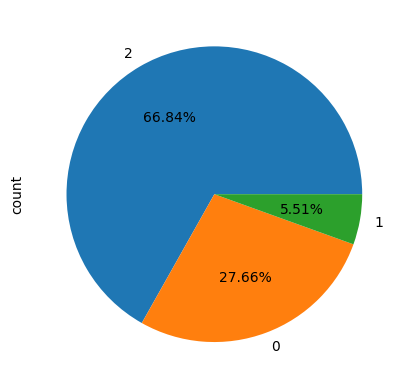

In [86]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

# luxury_score

In [87]:
df['luxury_score'].isnull().sum()

0

In [88]:
df['luxury_score'].describe()

count    3905.000000
mean       68.805378
std        53.234894
min         0.000000
25%        28.000000
50%        54.000000
75%       107.000000
max       174.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score'>

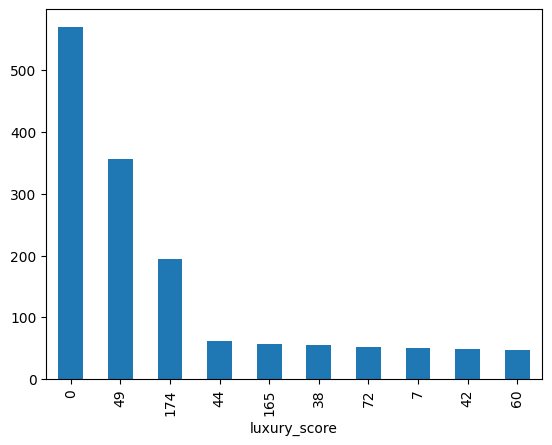

In [89]:
df['luxury_score'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')

/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_34582/3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

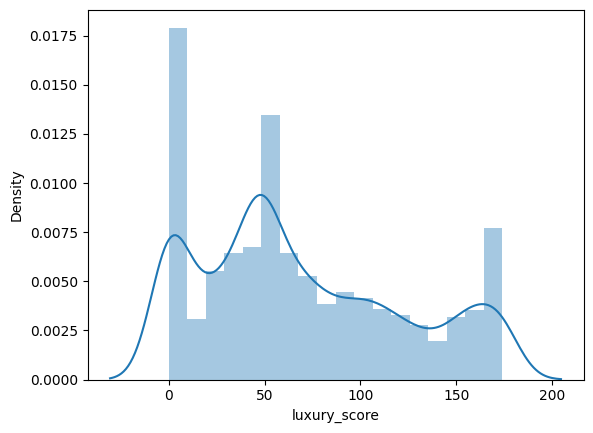

In [90]:
sns.distplot(df['luxury_score'])

<Axes: >

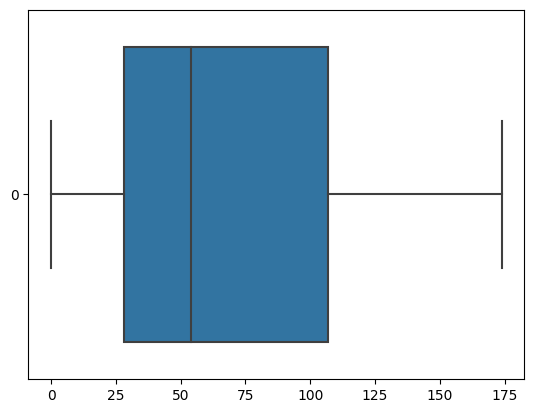

In [91]:
sns.boxplot(df['luxury_score'],orient='h')

<h2> Observation</h2>
<ul>
    <li><strong><h4> median value = 54 </h4> </strong></li>
    <li><strong><h4> multimodal distribution  </h4> </strong></li>
    <li><strong><h4> no significant outliers </h4> </strong></li>

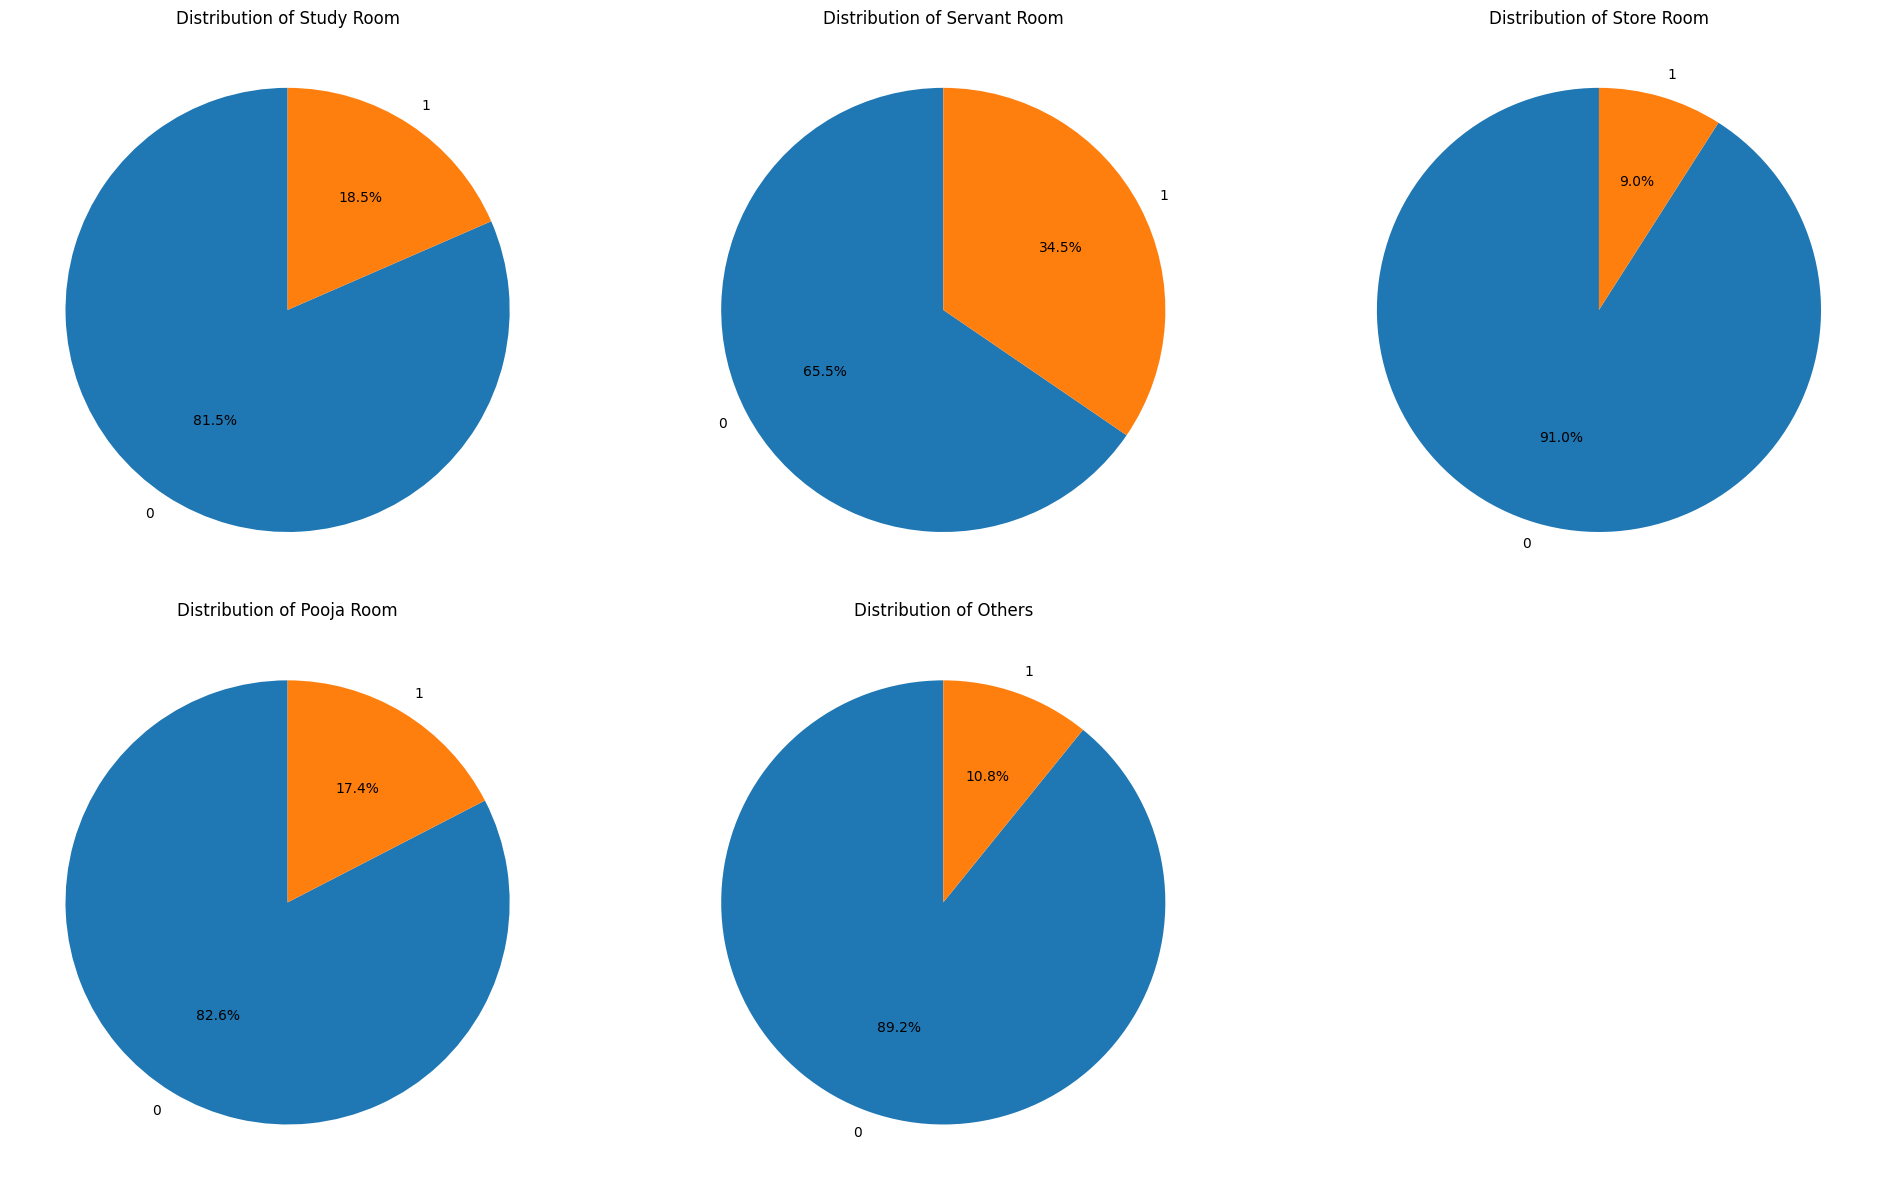

In [92]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()


In [93]:
df.to_csv('eda_ready.csv',index=False)